In [200]:
import os
import re
import shutil

import numpy as np
import matplotlib.pyplot as plt
import torch
from IPython.display import display, Image
import torchvision
from torchvision import models,transforms,datasets
from PIL import Image as PILImage

## Visualize the images

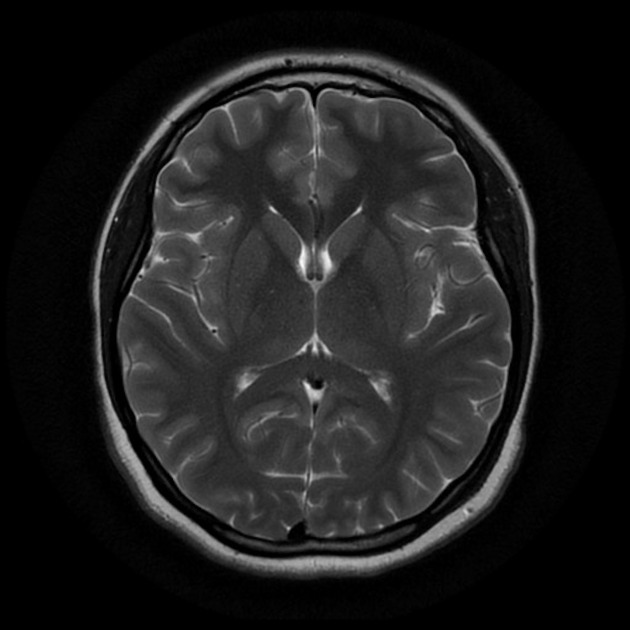

In [150]:
image_path = '../Data/brain_tumor/brain_tumor_dataset/no/1 no.jpeg'
display(Image(filename=image_path))

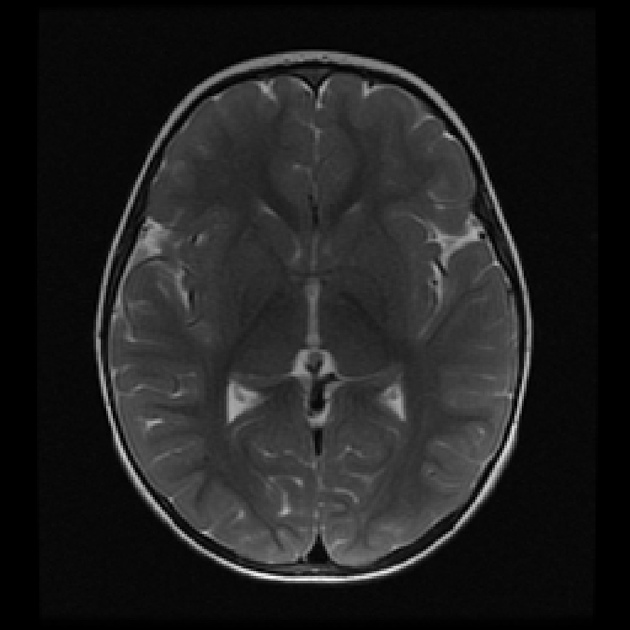

In [151]:
display(Image(filename='../Data/brain_tumor/brain_tumor_dataset/no/2 no.jpeg'))

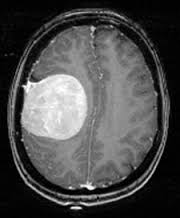

In [152]:
display(Image(filename='../Data/brain_tumor/brain_tumor_dataset/yes/Y1.jpg'))

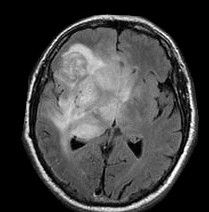

In [153]:
display(Image(filename='../Data/brain_tumor/brain_tumor_dataset/yes/Y2.jpg'))

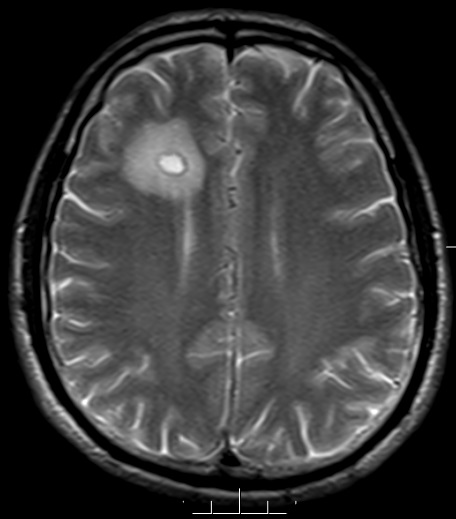

In [154]:
display(Image(filename='../Data/brain_tumor/brain_tumor_dataset/yes/Y3.jpg'))

In [157]:
no_folder_path = '../Data/brain_tumor/brain_tumor_dataset/no'
no_file_names = os.listdir(no_folder_path)
no_image_paths = [os.path.join(no_folder_path, file_name) for file_name in no_file_names]

yes_folder_path = '../Data/brain_tumor/brain_tumor_dataset/yes'
yes_file_names = os.listdir(yes_folder_path)
yes_image_paths = [os.path.join(yes_folder_path, file_name) for file_name in yes_file_names]

## Rename images

In [158]:
len(no_image_paths)

99

In [159]:
no_image_paths

['../Data/brain_tumor/brain_tumor_dataset/no/30 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/22 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/41 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/14 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/no 10.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/18 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/no 9.png',
 '../Data/brain_tumor/brain_tumor_dataset/no/no 7.jpeg',
 '../Data/brain_tumor/brain_tumor_dataset/no/no 8.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/3 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/.DS_Store',
 '../Data/brain_tumor/brain_tumor_dataset/no/43 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/20 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/32 no.jpg',
 '../Data/brain_tumor/brain_tumor_dataset/no/2 no.jpeg',
 '../Data/brain_tumor/brain_tumor_dataset/no/N15.jpg',
 '../Data/brain_tumor/brain_tumor_datas

In [161]:
no_file_names

['30 no.jpg',
 '22 no.jpg',
 '41 no.jpg',
 '14 no.jpg',
 'no 10.jpg',
 '18 no.jpg',
 'no 9.png',
 'no 7.jpeg',
 'no 8.jpg',
 'no.jpg',
 '3 no.jpg',
 '.DS_Store',
 '43 no.jpg',
 '20 no.jpg',
 '32 no.jpg',
 '2 no.jpeg',
 'N15.jpg',
 'no 99.jpg',
 'no 98.jpg',
 'No11.jpg',
 '7 no.jpg',
 '12 no.jpg',
 'No13.jpg',
 '44no.jpg',
 'N16.jpg',
 'N17.jpg',
 '28 no.jpg',
 '36 no.jpg',
 'No12.jpg',
 '47 no.jpg',
 '24 no.jpg',
 'No16.jpg',
 '10 no.jpg',
 '26 no.jpg',
 '45 no.jpg',
 'no 923.jpg',
 '38 no.jpg',
 'No17.jpg',
 '49 no.jpg',
 '34 no.jpg',
 '1 no.jpeg',
 'no 100.jpg',
 'No15.jpg',
 '5 no.jpg',
 'N11.jpg',
 'no 89.jpg',
 'No14.jpg',
 '9 no.jpg',
 'No19.jpg',
 'no 90.jpg',
 'N20.JPG',
 'N21.jpg',
 'No18.jpg',
 '15 no.jpg',
 '19 no.jpg',
 'N22.JPG',
 'no 92.jpg',
 '31 no.jpg',
 '40 no.jpg',
 '23 no.jpg',
 '17 no.jpg',
 'N26.JPG',
 'no 96.jpg',
 'no 97.jpg',
 '21 no.jpg',
 '42 no.jpg',
 'No22.jpg',
 '33 no.jpg',
 '50 no.jpg',
 'No20.jpg',
 'no 95.jpg',
 'N19.JPG',
 'no 94.jpg',
 'No21.jpg',
 '

In [165]:
for i, current_file_name in enumerate(no_file_names):
    file_extension = os.path.splitext(current_file_name)[1]
    new_name = 'N'+str(i+1)+file_extension
    if os.path.exists(os.path.join(no_folder_path,new_name)):
        new_name = 'N'+str(i+1)+'_new'+file_extension
    if file_extension == '':
        os.remove(os.path.join(no_folder_path,current_file_name))
    else:
        os.rename(os.path.join(no_folder_path, current_file_name), os.path.join(no_folder_path, new_name)) 

In [172]:
no_folder_path = '../Data/brain_tumor/brain_tumor_dataset/no'
no_file_names = os.listdir(no_folder_path)
no_image_paths = [os.path.join(no_folder_path, file_name) for file_name in no_file_names]

for current_file_name in no_file_names:
    if '_new' in current_file_name:
        new_name = current_file_name.replace('_new', '')
        os.rename(os.path.join(no_folder_path, current_file_name), os.path.join(no_folder_path, new_name)) 

In [173]:
no_folder_path = '../Data/brain_tumor/brain_tumor_dataset/no'
no_file_names = os.listdir(no_folder_path)
no_image_paths = [os.path.join(no_folder_path, file_name) for file_name in no_file_names]

In [174]:
len(no_image_paths)

98

## Resize images

In [175]:
# Total number of images
len(no_image_paths+yes_image_paths)

197

In [176]:
# Proportion of yes
len(yes_image_paths)/len(no_image_paths+yes_image_paths)

0.5025380710659898

In [184]:
image_sizes = {}
for img_path in no_image_paths + yes_image_paths:
    with PILImage.open(img_path) as img:
        if img.size in image_sizes.keys():
            image_sizes[img.size] += 1
        else:
            image_sizes[img.size] = 1

image_sizes

{(201, 251): 5,
 (196, 257): 1,
 (210, 264): 1,
 (550, 664): 1,
 (215, 234): 1,
 (201, 250): 2,
 (680, 680): 1,
 (218, 231): 2,
 (225, 225): 18,
 (442, 442): 4,
 (208, 242): 2,
 (173, 201): 2,
 (642, 361): 1,
 (468, 444): 1,
 (200, 252): 2,
 (275, 301): 1,
 (630, 630): 10,
 (300, 168): 3,
 (359, 449): 1,
 (230, 282): 1,
 (208, 248): 1,
 (472, 537): 1,
 (194, 259): 1,
 (228, 221): 2,
 (259, 194): 1,
 (512, 512): 4,
 (393, 400): 2,
 (428, 417): 1,
 (356, 474): 1,
 (275, 183): 1,
 (350, 393): 1,
 (300, 200): 1,
 (235, 214): 1,
 (212, 238): 1,
 (728, 725): 1,
 (409, 442): 1,
 (441, 442): 1,
 (206, 244): 2,
 (276, 326): 1,
 (380, 530): 1,
 (1920, 1080): 1,
 (750, 750): 1,
 (236, 213): 1,
 (150, 198): 1,
 (232, 217): 3,
 (200, 200): 1,
 (227, 222): 1,
 (214, 236): 1,
 (177, 197): 1,
 (630, 614): 1,
 (227, 262): 1,
 (420, 280): 1,
 (220, 275): 2,
 (400, 442): 1,
 (276, 338): 1,
 (192, 192): 1,
 (1024, 1024): 2,
 (504, 540): 1,
 (339, 340): 1,
 (442, 454): 1,
 (207, 243): 1,
 (232, 309): 1,
 (

In [185]:
len(image_sizes)

184

In [186]:
print(dict(sorted(image_sizes.items(), key=lambda item: item[1])))

{(196, 257): 1, (210, 264): 1, (550, 664): 1, (215, 234): 1, (680, 680): 1, (642, 361): 1, (468, 444): 1, (275, 301): 1, (359, 449): 1, (230, 282): 1, (208, 248): 1, (472, 537): 1, (194, 259): 1, (259, 194): 1, (428, 417): 1, (356, 474): 1, (275, 183): 1, (350, 393): 1, (300, 200): 1, (235, 214): 1, (212, 238): 1, (728, 725): 1, (409, 442): 1, (441, 442): 1, (276, 326): 1, (380, 530): 1, (1920, 1080): 1, (750, 750): 1, (236, 213): 1, (150, 198): 1, (200, 200): 1, (227, 222): 1, (214, 236): 1, (177, 197): 1, (630, 614): 1, (227, 262): 1, (420, 280): 1, (400, 442): 1, (276, 338): 1, (192, 192): 1, (504, 540): 1, (339, 340): 1, (442, 454): 1, (207, 243): 1, (232, 309): 1, (256, 256): 1, (467, 586): 1, (320, 355): 1, (230, 219): 1, (634, 929): 1, (1061, 1280): 1, (244, 308): 1, (374, 456): 1, (286, 370): 1, (263, 300): 1, (300, 347): 1, (315, 350): 1, (293, 337): 1, (291, 340): 1, (194, 260): 1, (273, 318): 1, (310, 355): 1, (355, 450): 1, (273, 342): 1, (864, 938): 1, (226, 223): 1, (1275

In [187]:
# Find the smallest dimension
min_dim = 5000
for h,w in image_sizes.keys():
    min_dim = min(min_dim,h,w)
print(min_dim)

150


In [190]:
target_size = (150, 150) 
resized_images = [PILImage.open(image_path).resize(target_size) for image_path in no_image_paths + yes_image_paths]

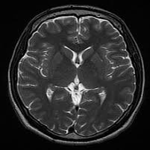

In [192]:
display(IPImage(data=PILImage.fromarray(np.array(resized_images[0]))._repr_png_()))

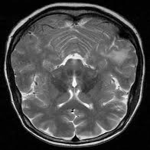

In [193]:
display(IPImage(data=PILImage.fromarray(np.array(resized_images[1]))._repr_png_()))

In [194]:
# Aspect Ratio Preservation:
# Resize images such that the smaller dimension matches the target size and pad the other dimension. This ensures that the aspect ratio is preserved.

# target_size = (224, 224)  # Specify your target size
# resized_images = [
#     Image.open(image_path).resize(
#         (target_size[0], int(target_size[0] * img.size[1] / img.size[0])),
#         Image.ANTIALIAS,
#     )
#     for image_path in image_paths
# ]

## Split into train and test

Take one third of the data set as the test set

In [196]:
# Create a train and test directory
os.makedirs('../Data/brain_tumor/brain_tumor_dataset/train', exist_ok=True)
os.makedirs('../Data/brain_tumor/brain_tumor_dataset/test', exist_ok=True)

In [204]:
# Copy 30% of the images in the test directory and the rest of them in the train directory
for i, img in enumerate(no_image_paths+yes_image_paths):
    file_name = os.path.basename(img)
    if i % 3 == 0:
        set_path = '../Data/brain_tumor/brain_tumor_dataset/test'
    else:
        set_path = '../Data/brain_tumor/brain_tumor_dataset/train'
        
    shutil.copy(img,os.path.join(set_path,file_name))